1. Gender is encoded as either 0 or 1. Are women encoded as 0 or as 1? (Support your answer.)

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class DataInvestigator:
    def __init__(self, df):
        self.df = df
        self.col_nums = {} # empty dictionary to hold column indexes
        key = 0
        # loop through the columns and set the index to the label
        for c in df.columns:
            self.col_nums[key] = c
            key += 1

    # helper function to set the column indexes to labels
    def get_col_label(self, col):
        col_label = self.col_nums[col]
        return col_label
    
    def baseline(self, col):
        try:
            col_label = self.get_col_label(col) # get the column label from the index
            col_values = self.df[col_label] # get the column values from the column label
            value_counts = {} # empty dictionary to hold the value counts from the column
            for v in col_values:
                # count the occurrences of each value in the column
                if v in value_counts:
                    value_counts[v] += 1
                else:
                    value_counts[v] = 1
            max_count = 0 
            max_value = 0 # variable to hold the value with the highest count
            for val, count in value_counts.items():
                # find the value with the highest count
                if count > max_count:
                    max_count = count
                    max_value = val
            return max_value
        except: # in case of an error, return None
            return None

    def corr(self, col1, col2):
        try:
            # get the column labels from the indexes
            col_label1 = self.get_col_label(col1)
            col_label2 = self.get_col_label(col2)
            return self.df[col_label1].corr(self.df[col_label2])
        except: # in case of an error, return None
            return None

    def zeroR(self, col):
        return self.baseline(col)

df = pd.read_csv('gallstone.csv')
di = DataInvestigator(df)
print(di.baseline(1))
print(di.corr(2, 3))
print(di.zeroR(1))

53
-0.032308399159472014
53


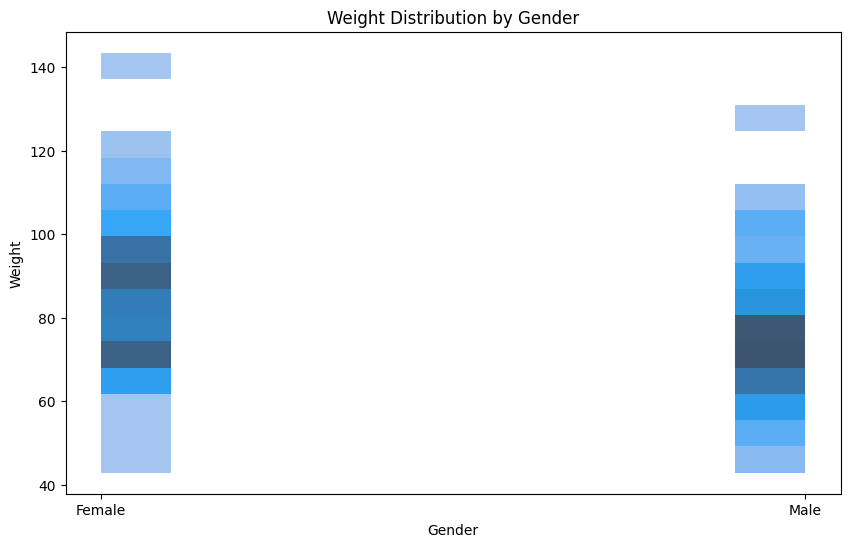

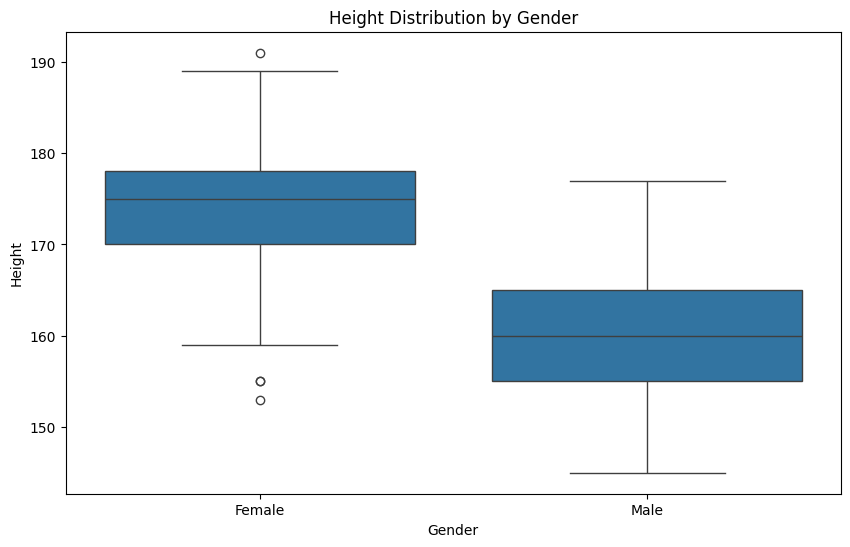

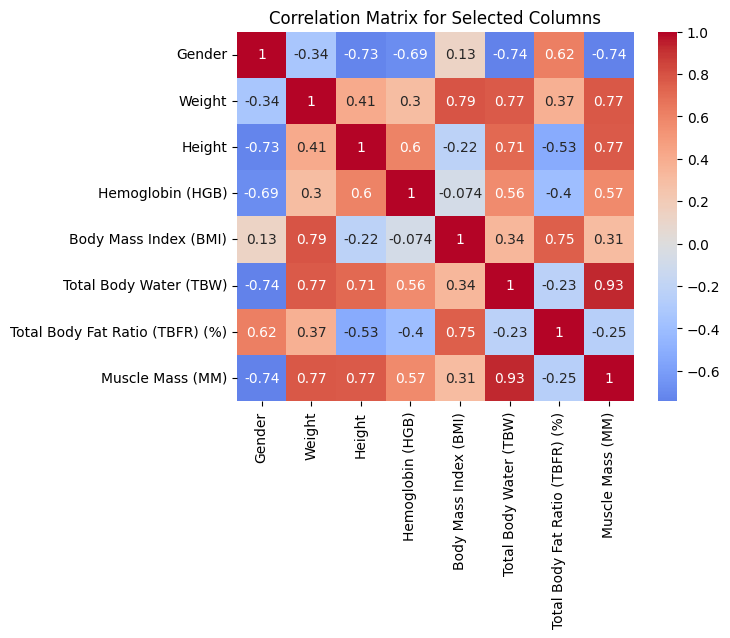

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Gender', y='Weight', data=df)
plt.title('Weight Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) # Assuming 0=Female and 1=Male
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height', data=df)
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male']) # Assuming 0=Female and 1=Male based on typical height differences
plt.show()
selected_cols = ['Gender', 'Weight', 'Height', 'Hemoglobin (HGB)', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Muscle Mass (MM)']
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Selected Columns')
plt.show()
# 1. Women are encoded as 1. When I ran the correlation method with the "Gender" column, comparing with some other columns, it shows that 
# Gender correlate negatively with height suggesting the higher number represents women. So as Gender increases, height decreases. Also, 
# women usually have lower height, weight, and hemoglobin than men. Based on the correlation results, the measurements of height, weight 
# and hemoglobin go down as Gender increases from 0 to 1, even if these values are negative. Therefore, women are encoded as 1.

2. Are the Glucose values normally distributed? What is a “normal” range? What, if any, are outlier values?![image.png](attachment:bbf87eba-e0c9-43f8-b7f5-85ffa24e826c.png)![image.png](attachment:218b043a-d305-41ff-aec7-b5a839ee8c60.png)![image.png](attachment:74032d5a-acff-40a9-b246-d4f2a97f18c8.png)![image.png](attachment:b4f7e9af-d958-46ef-abe4-f26777b46b75.png)

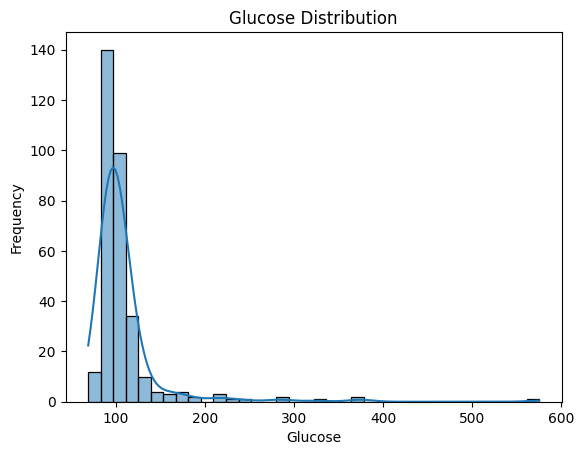

In [16]:
sns.histplot(df['Glucose'], kde=True)
plt.title('Glucose Distribution')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

In [17]:
df['Glucose'].describe()

count    319.000000
mean     108.688715
std       44.848714
min       69.000000
25%       92.000000
50%       98.000000
75%      109.000000
max      575.000000
Name: Glucose, dtype: float64

In [18]:
# 2. The histogram plot shows that most values cluster around 90 to 100 for Glucose, and there are a few values between 200 to 600. The 
# Glucose values are normally distributed approximately 109 mg/dL. The normal range is about approximately 50 to 140 mg/dL. There are 
# outlier values that are greater than 140 mg/dL.